**PART 1 : DATA CLEANING**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline

In [2]:
# Creating list of unique claim numbers in dataset
# MC claims file 




path = "C:/Users/nisha/Documents/DATA 900/Data Architechture/Big assignment/PUBLICUSE_CLAIM_MC_2016/"

listofclaims = []
k = 2
for i in range(8):
    a = datetime.now()
    j = (i+1)*2000000
#     print(k,j)
    lista = list(range(1,j))
    df = pd.read_table(path+"PUBLICUSE_CLAIM_MC_2016.txt", sep = "|", encoding='latin-1', nrows = 2000000, skiprows = lista)
#     print(len(list(df.CLAIM_ID_KEY.unique())))
#     listofclaims.append (list(df.CLAIM_ID_KEY.unique()))
    listofclaims =listofclaims + list(df.CLAIM_ID_KEY.unique())
    k = 1+j
    timepassed = datetime.now() - a
    print(timepassed)
    del(df)



C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,24,28,30,34,35,36,37,38,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:13.735858


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (24,28,30,34,35,36,37,38,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:14.765368


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,28,30,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:17.272479


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,28,30,35,36,37,38,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:18.805588


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,28,35,36,37,38,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:20.767864


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,24,25,28,30,35,36,37,38,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:24.444957


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:25.673722


C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,18,24,25,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:21.010051


In [15]:
listofclaims = pd.DataFrame(listofclaims) #converting it into a dataframe
listofclaims.columns = ['CLAIM_ID_KEY']
unique_claims = listofclaims.head(1000000)

In [17]:
unique_claims.shape

(1000000, 1)

In [18]:
# Merging the unique sample of 1 million claims with the original dataset through chunk merging

import numpy as np
import pandas as pd

path = "C:/Users/nisha/Documents/DATA 900/Data Architechture/Big assignment/PUBLICUSE_CLAIM_MC_2016/"

df1= pd.DataFrame()

milclaims = pd.read_table(path+"PUBLICUSE_CLAIM_MC_2016.txt", sep = "|", encoding='latin-1')
mergedata = pd.merge(milclaims, unique_claims, how='inner', on=['CLAIM_ID_KEY'])
df1 = pd.concat([df1, mergedata])


df1.head(10)



C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,18,24,25,28,30,31,32,33,34,35,36,37,38,39,40,41,42,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,COVERAGE_CLASS,FROM_YEAR,ADM_YR,DIS_YR,CLAIM_ID_KEY,CS_CLAIM_ID_KEY,SERVICES_KEY,SV_LINE,FORM_TYPE,SV_STAT,...,MR_LINE_CASE_KEY,CASES,UTILS,NDC,CLAIM_STATUS_ORIG,ECODE_ORIG,ADMIT_HOUR,DISCHARGE_HOUR,CLAIM_ADJUSTMENT_LOGIC,IMPUTED_SERVICE_KEY
0,MED,2016,-1,-1,123959956,123959956,188833252,2,U,D,...,544,NaN,NaN,NaN,22,NaN,-1.0,-1.0,CAL4,2016_5544460
1,MED,2016,-1,-1,123959956,123959956,188833250,1,U,D,...,544,NaN,NaN,NaN,22,NaN,-1.0,-1.0,CAL4,2016_5544460
2,MED,2016,-1,2016,123959956,123959956,188833247,3,U,P,...,544,NaN,NaN,NaN,22,NaN,1200.0,1500.0,CAL4,2016_5544460
3,MED,2016,-1,2016,118320306,118320306,176869280,30,U,P,...,550,NaN,NaN,NaN,1,NaN,-1.0,NaN,CAL2,2016_6331969
4,MED,2016,-1,2016,118320306,118320306,176869291,40,U,P,...,550,NaN,NaN,NaN,1,NaN,-1.0,NaN,CAL2,2016_6331969
5,MED,2016,-1,2016,118320306,118320306,176869283,50,U,P,...,550,NaN,NaN,NaN,1,NaN,-1.0,NaN,CAL2,2016_6331969
6,MED,2016,-1,2016,118320306,118320306,176869289,70,U,P,...,550,NaN,NaN,NaN,1,NaN,-1.0,NaN,CAL2,2016_6331969
7,MED,2016,-1,2016,118320306,118320306,176869284,80,U,P,...,550,NaN,NaN,NaN,1,NaN,-1.0,NaN,CAL2,2016_6331969
8,MED,2016,-1,2016,118320306,118320306,176869279,10,U,D,...,550,NaN,NaN,NaN,4,NaN,-1.0,NaN,CAL2,2016_6331969
9,MED,2016,-1,2016,118320306,118320306,176869286,20,U,D,...,550,NaN,NaN,NaN,4,NaN,-1.0,NaN,CAL2,2016_6331969


In [19]:
df1.shape #2.5 million rows of data

(2477762, 63)

In [20]:
#listing all columns in the merged df
df1.columns
for index,i in enumerate(df1.columns):
    print("Column " + str(index) + ":" + str(i))

Column 0:COVERAGE_CLASS
Column 1:FROM_YEAR
Column 2:ADM_YR
Column 3:DIS_YR
Column 4:CLAIM_ID_KEY
Column 5:CS_CLAIM_ID_KEY
Column 6:SERVICES_KEY
Column 7:SV_LINE
Column 8:FORM_TYPE
Column 9:SV_STAT
Column 10:DIS_STAT
Column 11:POS
Column 12:AGE
Column 13:SEX
Column 14:MEMBER_COUNTY
Column 15:MEMBER_STATE
Column 16:PRODUCT_TYPE
Column 17:LOB
Column 18:INSURANCE_TYPE
Column 19:PROC_CODE
Column 20:CPT_MOD1
Column 21:CPT_MOD2
Column 22:REV_CODE
Column 23:UB_BILL_TYPE
Column 24:ADM_SRC
Column 25:ADM_TYPE
Column 26:CLIENT_LOS
Column 27:ICD_10_OR_HIGHER
Column 28:ICD_PROC_01_PRI
Column 29:ICD_DIAG_01_PRIMARY
Column 30:ICD_DIAG_ADMIT
Column 31:ICD_DIAG_02
Column 32:ICD_DIAG_03
Column 33:ICD_DIAG_04
Column 34:ICD_DIAG_05
Column 35:ICD_DIAG_06
Column 36:ICD_DIAG_07
Column 37:ICD_DIAG_08
Column 38:ICD_DIAG_09
Column 39:ICD_DIAG_10
Column 40:ICD_DIAG_11
Column 41:ICD_DIAG_12
Column 42:ICD_DIAG_13
Column 43:SERV_PROV_CW_KEY
Column 44:BILL_PROV_CW_KEY
Column 45:QTY
Column 46:AMT_BILLED
Column 47:AMT_

In [37]:
df1.to_csv("C:/Users/nisha/Documents/DATA 900/Data Architechture/Big assignment/PUBLICUSE_CLAIM_MC_2016/maindata.csv")

In [38]:
df1.shape

(2477762, 63)

In [6]:
#reducing to the columns necessary and removing unnecessary columns
#columns_needed = [4,6,7,12,13,15,16,17,19,23,27,28,29,30,31,32,33,45,46,47,48,55,56]
columns_needed=[5,7,8,13,14,15,16,18,20,24,28,29,30,31,32,33,34,46,47,48,49,50,51,52,55,56]

In [7]:
#inserting the table as df into python, it has 2.4 million rows and 23 columns
wanted = pd.read_table("C:/Users/nisha/Documents/DATA 900/Data Architechture/Big assignment/PUBLICUSE_CLAIM_MC_2016/maindata.csv", sep = ",", encoding='latin-1', usecols  = columns_needed)

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (13,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
wanted.head(10)
wanted.columns

Index(['CLAIM_ID_KEY', 'SERVICES_KEY', 'SV_LINE', 'AGE', 'SEX',
       'MEMBER_COUNTY', 'MEMBER_STATE', 'LOB', 'PROC_CODE', 'UB_BILL_TYPE',
       'ICD_10_OR_HIGHER', 'ICD_PROC_01_PRI', 'ICD_DIAG_01_PRIMARY',
       'ICD_DIAG_ADMIT', 'ICD_DIAG_02', 'ICD_DIAG_03', 'ICD_DIAG_04', 'QTY',
       'AMT_BILLED', 'AMT_PAID', 'AMT_DEDUCT', 'AMT_COINS', 'AMT_COPAY',
       'AMT_PREPAID', 'CASES', 'UTILS'],
      dtype='object')

In [9]:
#grouping line items into "instate" or "outstate"
wanted['STATE'] = np.where(wanted['MEMBER_STATE'] == 'NH', 'Instate', 'Outstate')

In [10]:
#converting the 90+ age as an integer
wanted['AGE'] = np.where(wanted['AGE'] == '90+', 90 , wanted['AGE'])

#converting all the age values in the column into integers
wanted['AGE'] = wanted['AGE'].astype(int)
  
#grouping the age into categories based on the values
wanted['AGE_GROUPS'] = np.where(wanted['AGE'] < 18,'teens',np.where(wanted['AGE'] <= 34,'youth',np.where(wanted['AGE'] <= 65,'midage','old')))
                

In [61]:
wanted.to_csv("C:/Users/nisha/Documents/DATA 900/Data Architechture/Big assignment/PUBLICUSE_CLAIM_MC_2016/wanted.csv")

In [11]:
wanted.head(10)

,CLAIM_ID_KEY,SERVICES_KEY,SV_LINE,AGE,SEX,MEMBER_COUNTY,MEMBER_STATE,LOB,PROC_CODE,UB_BILL_TYPE,...,AMT_BILLED,AMT_PAID,AMT_DEDUCT,AMT_COINS,AMT_COPAY,AMT_PREPAID,CASES,UTILS,STATE,AGE_GROUPS
0,123959956,188833252,2,27,F,13,NH,COMMERCIAL,NaN,311.0,...,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,Instate,youth
1,123959956,188833250,1,27,F,13,NH,COMMERCIAL,NaN,311.0,...,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,Instate,youth
2,123959956,188833247,3,27,F,13,NH,COMMERCIAL,NaN,111.0,...,0.0,13351.56,75.0,0.0,0.0,0.0,NaN,NaN,Instate,youth
3,118320306,176869280,30,62,M,5,NH,COMMERCIAL,80053,311.0,...,81.0,34.58,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage
4,118320306,176869291,40,62,M,5,NH,COMMERCIAL,81003,311.0,...,8.0,7.35,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage
5,118320306,176869283,50,62,M,5,NH,COMMERCIAL,85027,311.0,...,23.0,21.16,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage
6,118320306,176869289,70,62,M,5,NH,COMMERCIAL,85730,311.0,...,21.0,19.64,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage
7,118320306,176869284,80,62,M,5,NH,COMMERCIAL,86850,311.0,...,37.0,37.00,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage
8,118320306,176869279,10,62,M,5,NH,COMMERCIAL,36415,311.0,...,13.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage
9,118320306,176869286,20,62,M,5,NH,COMMERCIAL,36415,311.0,...,13.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,Instate,midage


In [12]:
wanted.shape

(2477762, 28)

In [13]:
#droping all rows with amt_paid as negative
wanted.drop(wanted[wanted.AMT_PAID < 0].index, inplace = True)

**Q1** - **Analysis of demographics**

a) Perform a thorough analysis of differences in total costs of healthcare by gender, age groups, county of residence, and in-state vs out-of-state resident patients. 

In [15]:
grouped_gender = wanted.groupby("SEX")
grouped_agegroup = wanted.groupby("AGE_GROUPS")
grouped_county = wanted.groupby("MEMBER_COUNTY")
grouped_state = wanted.groupby("STATE")

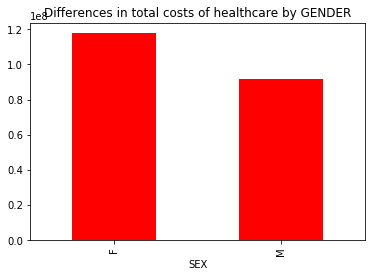

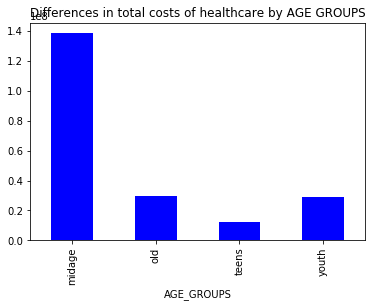

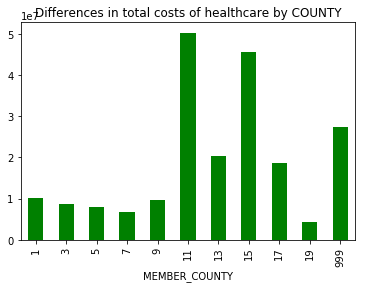

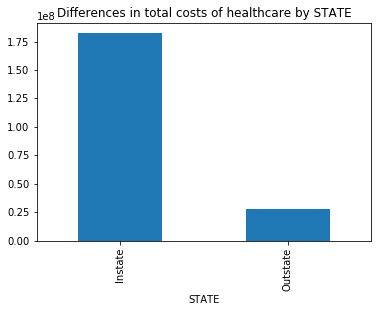

In [22]:
grouped_gender['AMT_PAID'].agg(np.sum).plot(kind='bar',color='r')
plt.title('Differences in total costs of healthcare by GENDER')
plt.show()
grouped_agegroup['AMT_PAID'].agg(np.sum).plot(kind='bar',color='b')
plt.title('Differences in total costs of healthcare by AGE GROUPS')
plt.show()
grouped_county['AMT_PAID'].agg(np.sum).plot(kind='bar',color='g')
plt.title('Differences in total costs of healthcare by COUNTY')
plt.show()
grouped_state['AMT_PAID'].agg(np.sum).plot(kind='bar')
plt.title('Differences in total costs of healthcare by STATE')
plt.show()


In [80]:
print(grouped_gender['AMT_PAID'].agg([np.size, np.mean, np.std]))

          size       mean         std
SEX                                  
F    1400683.0  84.080942  533.168692
M    1040977.0  88.084107  641.807496


In [88]:
print(grouped_state['AMT_PAID'].agg([np.size, np.mean, np.std]))

               size       mean         std
STATE                                     
Instate   2030224.0  89.694289  609.806399
Outstate   411436.0  66.510413  417.818036


In [89]:
print(grouped_agegroup['AMT_PAID'].agg([np.size, np.mean, np.std]))

                 size        mean         std
AGE_GROUPS                                   
midage       973176.0  142.296592  764.710939
old         1121365.0   26.691072  265.061583
teens         98605.0  123.277344  795.449792
youth        248514.0  116.285004  663.218626


In [90]:
print(grouped_county['AMT_PAID'].agg([np.size, np.mean, np.std]))

                   size        mean         std
MEMBER_COUNTY                                  
1              133186.0   76.834446  587.246048
3               84338.0  101.626909  832.140809
5              102891.0   76.510050  455.951329
7               50293.0  132.853769  803.275912
9               99027.0   96.830307  623.213340
11             600951.0   83.661860  598.493905
13             249825.0   81.200193  537.814609
15             501733.0   90.690418  597.133243
17             157598.0  118.905785  676.230674
19              50382.0   86.308290  622.487505
999            411436.0   66.510413  417.818036
